In [323]:
import numpy as np
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import math as mh
from scipy.stats import mstats

In [32]:
set1 = pd.read_csv("C:\\Qianmei_STAT\\Datapalooza\\Data\\Forranking.csv", converters={'zip': lambda x: str(x)})

In [33]:
set1.head()

,median_household_income_dollars,Percent_Unemployment_Rate,number_total_househlds,grandparent_no_parent_fam_pct,single_chi18_fam_pct,one_working_chi18_fam_pct,retir_income_pct,no_child_one_working_fam_pct,chi18_fam_pct2,total_number_civilian,zip,county,statename,fips,Disability_pct
0,11757,41.2,5818,0.005156,0.148505,0.039017,0.143004,0.073737,0.081128,16969,00601,NaN,NaN,72001,0.147622
1,16190,17.7,12719,0.006054,0.113138,0.048038,0.130042,0.086563,0.082947,30154,00602,NaN,NaN,72003,0.078066
2,16645,22.5,19009,0.004577,0.147562,0.041664,0.158188,0.062970,0.079489,11131,00603,NaN,NaN,72005,0.018597
3,13387,12.0,1959,0.047473,0.124043,0.051557,0.204186,0.112302,0.075549,4889,00606,NaN,NaN,72093,0.106770
4,18741,14.7,9120,0.018969,0.108991,0.043969,0.164474,0.077522,0.088268,14906,00610,NaN,NaN,72011,0.101301


In [34]:
set1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32989 entries, 0 to 32988
Data columns (total 15 columns):
median_household_income_dollars    32989 non-null int64
Percent_Unemployment_Rate          32989 non-null float64
number_total_househlds             32989 non-null int64
grandparent_no_parent_fam_pct      32420 non-null float64
single_chi18_fam_pct               32420 non-null float64
one_working_chi18_fam_pct          32420 non-null float64
retir_income_pct                   32420 non-null float64
no_child_one_working_fam_pct       32420 non-null float64
chi18_fam_pct2                     32420 non-null float64
total_number_civilian              32989 non-null int64
zip                                32989 non-null object
county                             32805 non-null object
statename                          32805 non-null object
fips                               32989 non-null int64
Disability_pct                     32989 non-null float64
dtypes: float64(8), int64(4), ob

In [37]:
#set1.drop(['total_number_civilian','fips'], axis = 1, inplace = True)
t1cor = set1.corr()

In [38]:
set1.head()

,median_household_income_dollars,Percent_Unemployment_Rate,number_total_househlds,grandparent_no_parent_fam_pct,single_chi18_fam_pct,one_working_chi18_fam_pct,retir_income_pct,no_child_one_working_fam_pct,chi18_fam_pct2,zip,county,statename,Disability_pct
0,11757,41.2,5818,0.005156,0.148505,0.039017,0.143004,0.073737,0.081128,00601,NaN,NaN,0.147622
1,16190,17.7,12719,0.006054,0.113138,0.048038,0.130042,0.086563,0.082947,00602,NaN,NaN,0.078066
2,16645,22.5,19009,0.004577,0.147562,0.041664,0.158188,0.062970,0.079489,00603,NaN,NaN,0.018597
3,13387,12.0,1959,0.047473,0.124043,0.051557,0.204186,0.112302,0.075549,00606,NaN,NaN,0.106770
4,18741,14.7,9120,0.018969,0.108991,0.043969,0.164474,0.077522,0.088268,00610,NaN,NaN,0.101301


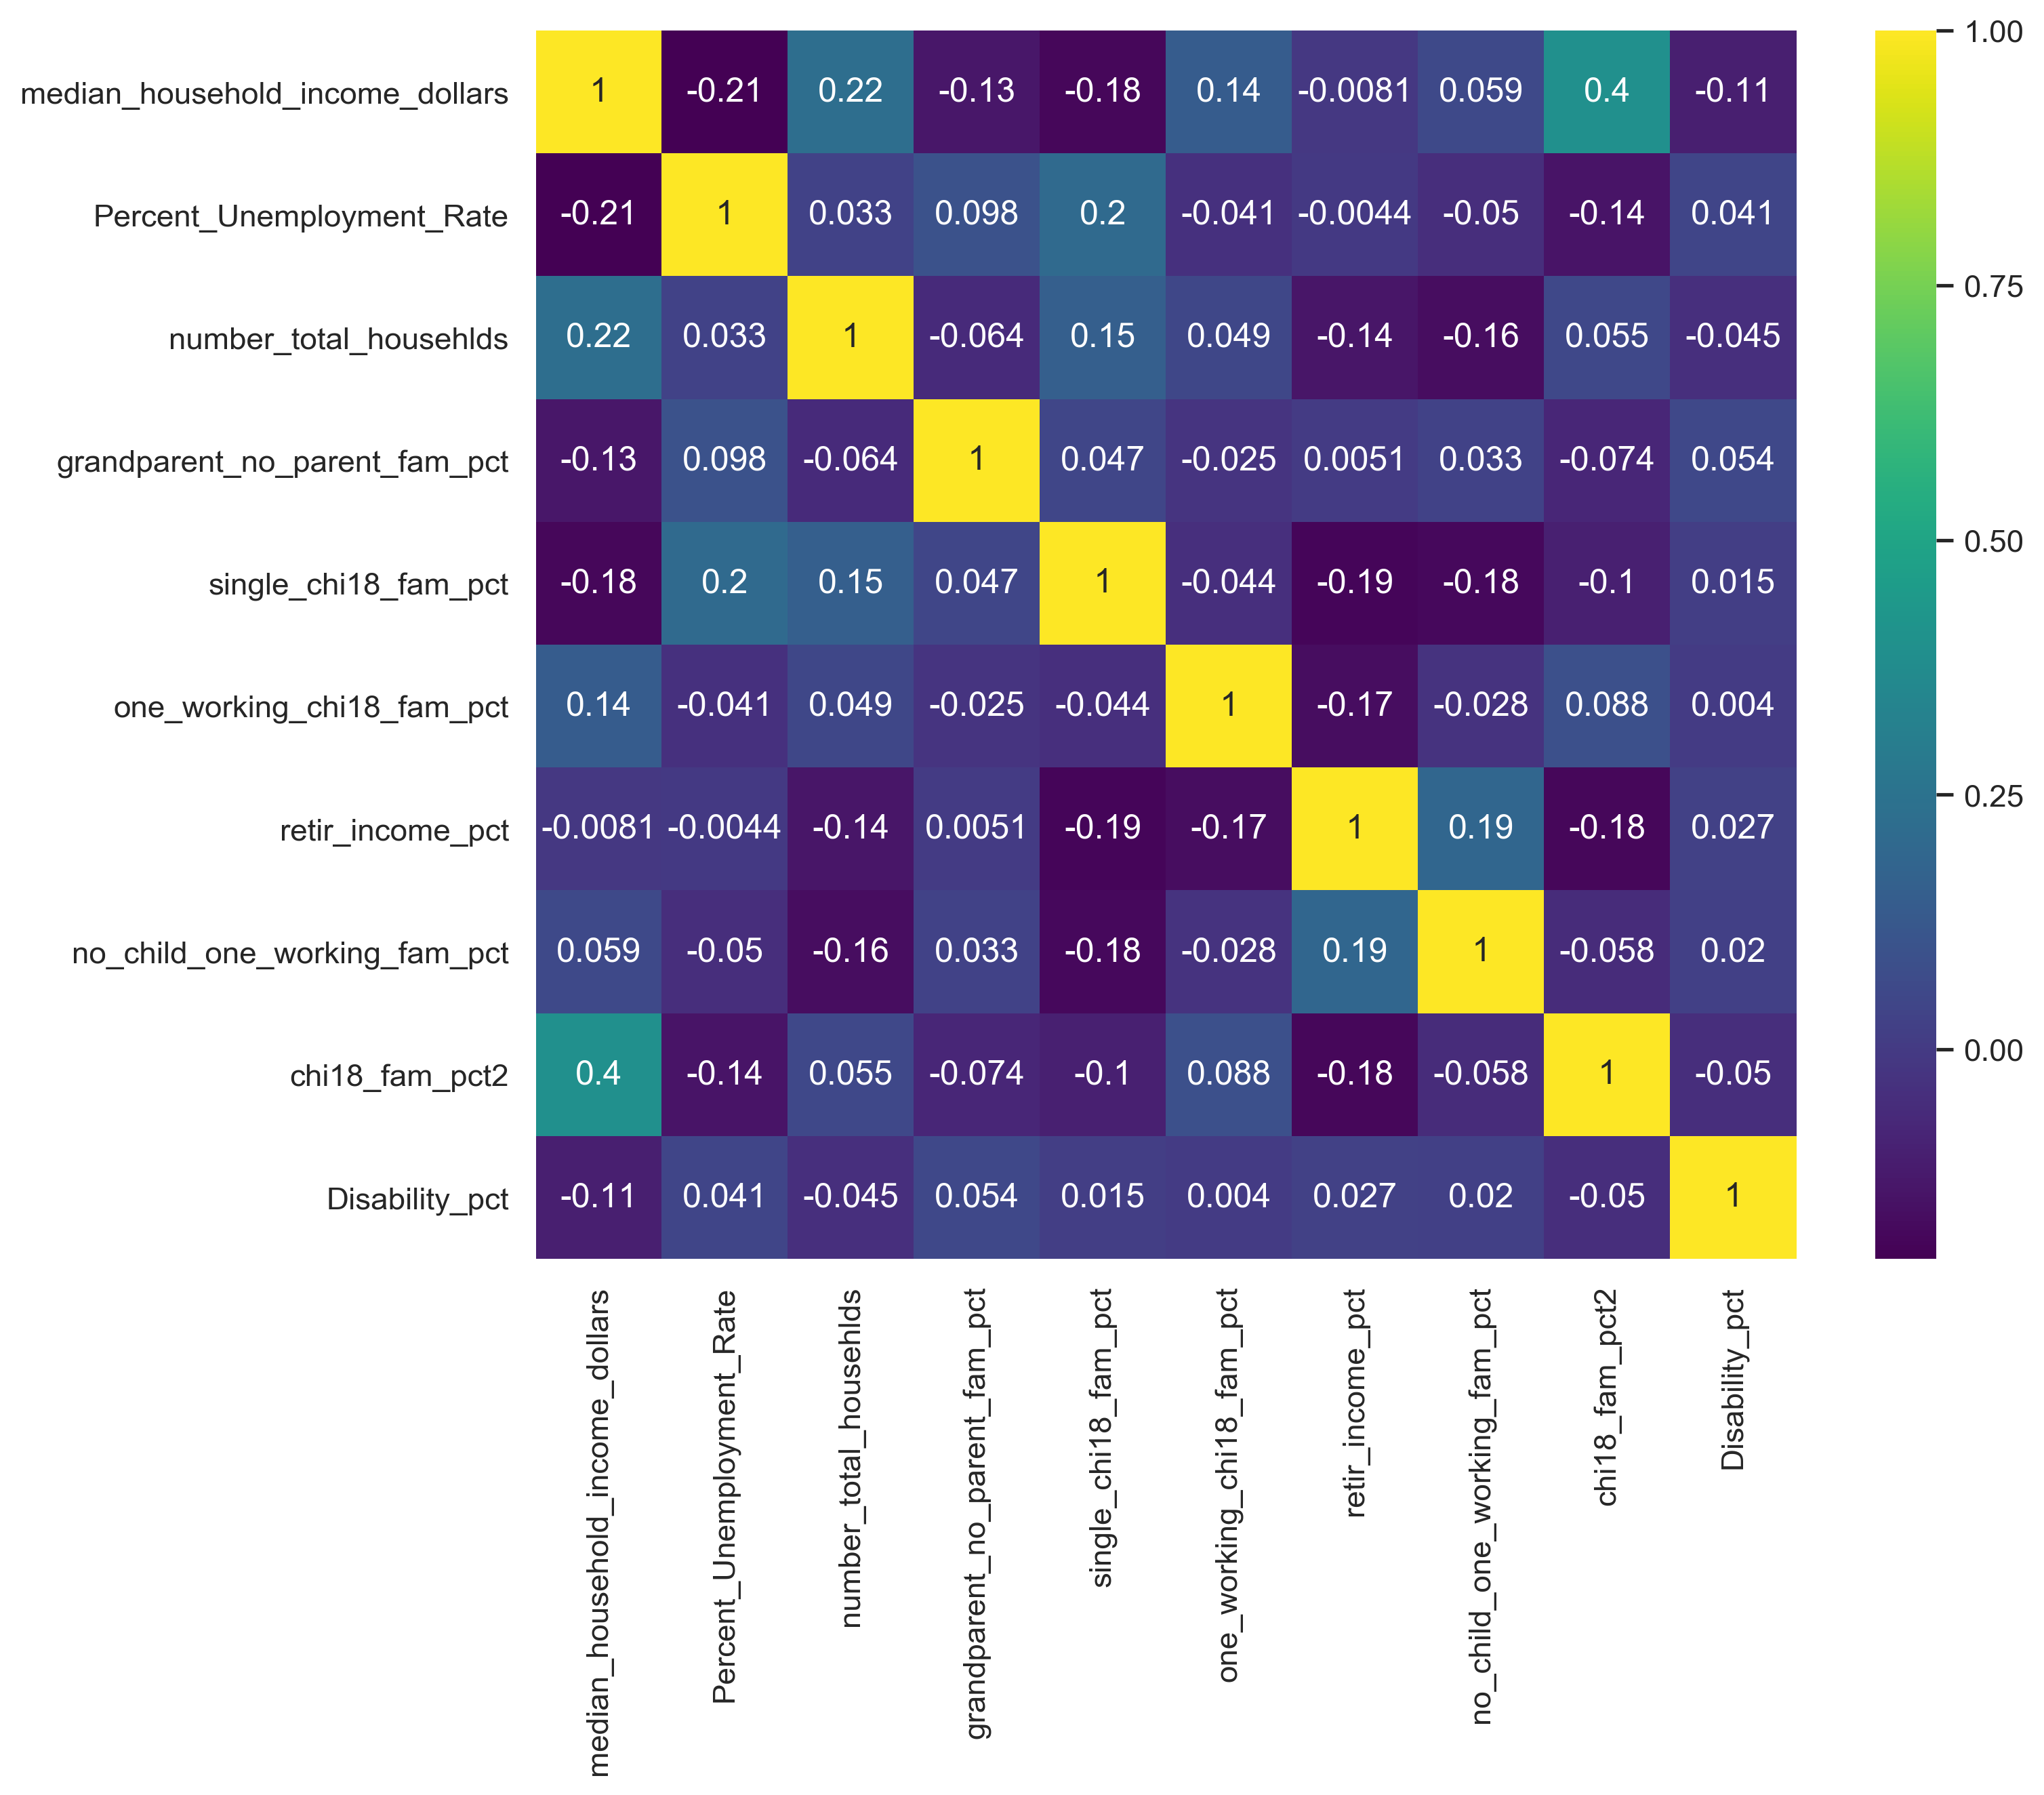

In [39]:
# corr heatmap
sns.set()
plt.figure(figsize = (10,8),dpi = 300)
sns.heatmap(t1cor, cmap = 'viridis', annot = True)

In [40]:
set2 = set1.select_dtypes(exclude=['object'])

In [41]:
set2.head()

,median_household_income_dollars,Percent_Unemployment_Rate,number_total_househlds,grandparent_no_parent_fam_pct,single_chi18_fam_pct,one_working_chi18_fam_pct,retir_income_pct,no_child_one_working_fam_pct,chi18_fam_pct2,Disability_pct
0,11757,41.2,5818,0.005156,0.148505,0.039017,0.143004,0.073737,0.081128,0.147622
1,16190,17.7,12719,0.006054,0.113138,0.048038,0.130042,0.086563,0.082947,0.078066
2,16645,22.5,19009,0.004577,0.147562,0.041664,0.158188,0.062970,0.079489,0.018597
3,13387,12.0,1959,0.047473,0.124043,0.051557,0.204186,0.112302,0.075549,0.106770
4,18741,14.7,9120,0.018969,0.108991,0.043969,0.164474,0.077522,0.088268,0.101301


C:\Users\qianm\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\qianm\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


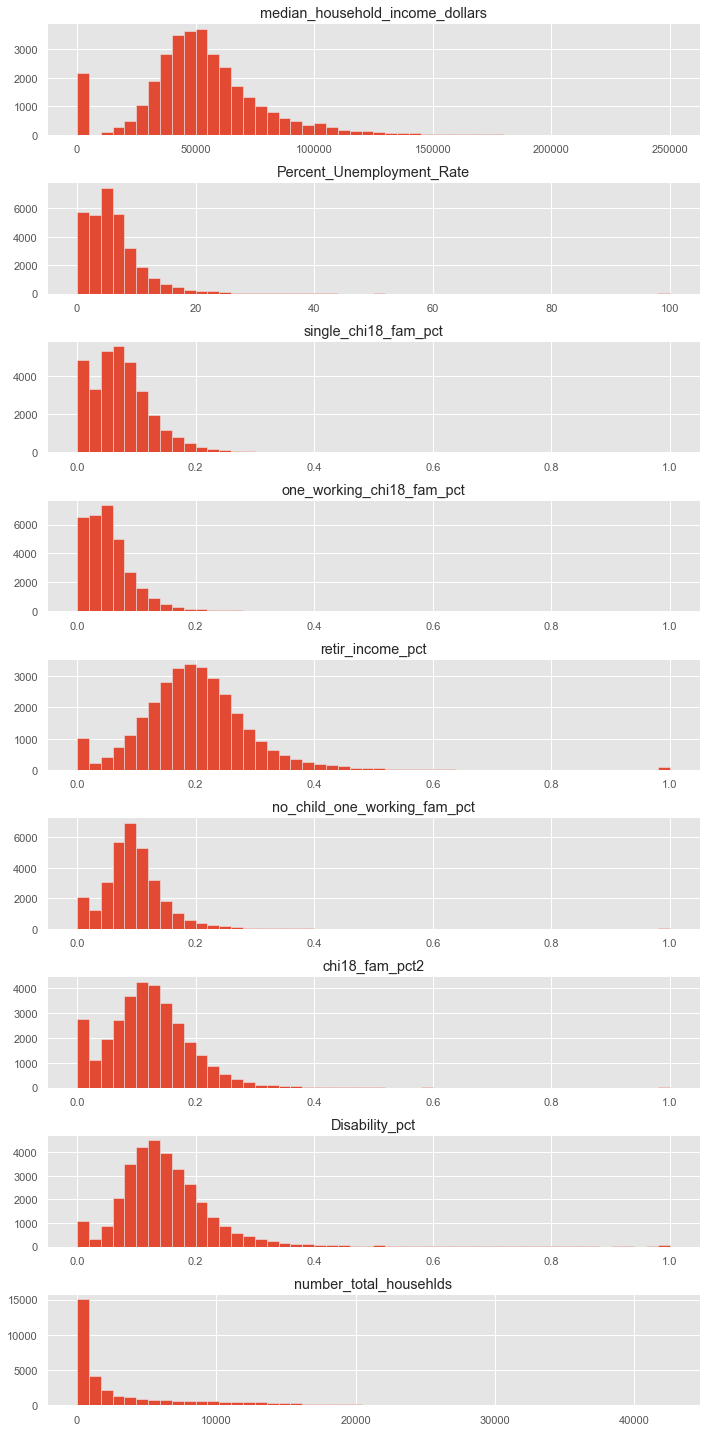

In [606]:
plt.style.use('ggplot')
plotall2(9,set2.drop(['grandparent_no_parent_fam_pct','number_total_househlds'], axis = 1).join(set2['number_total_househlds']))

In [73]:
# try to cap every col at 0.85 quantile
qset = set2.quantile(q=0.95, axis=0)

In [222]:
set2_s = set2.copy()

In [243]:
set2_s['Percent_Unemployment_Rate'] = set2_s['Percent_Unemployment_Rate'].apply(lambda x:-x)

In [233]:
set2_s['retir_income_pct'] = set2_s['retir_income_pct'].apply(lambda x:-x)

In [236]:
def takelog(x):
    try:
        return mh.log10(x)
    except:
        return float(0)

In [239]:
set2_s['number_total_househlds'] = set2_s['number_total_househlds'].apply(takelog)

In [241]:
set2_s['grandparent_no_parent_fam_pct'] = set2_s['grandparent_no_parent_fam_pct'].apply(takelog)

In [244]:
set2_s.head()

,median_household_income_dollars,Percent_Unemployment_Rate,number_total_househlds,grandparent_no_parent_fam_pct,single_chi18_fam_pct,one_working_chi18_fam_pct,retir_income_pct,no_child_one_working_fam_pct,chi18_fam_pct2,Disability_pct
0,11757,-41.2,3.764774,0.0,0.148505,0.039017,-0.143004,0.073737,0.081128,0.147622
1,16190,-17.7,4.104453,0.0,0.113138,0.048038,-0.130042,0.086563,0.082947,0.078066
2,16645,-22.5,4.278959,0.0,0.147562,0.041664,-0.158188,0.062970,0.079489,0.018597
3,13387,-12.0,3.292034,0.0,0.124043,0.051557,-0.204186,0.112302,0.075549,0.106770
4,18741,-14.7,3.959995,0.0,0.108991,0.043969,-0.164474,0.077522,0.088268,0.101301


C:\Users\qianm\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\qianm\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


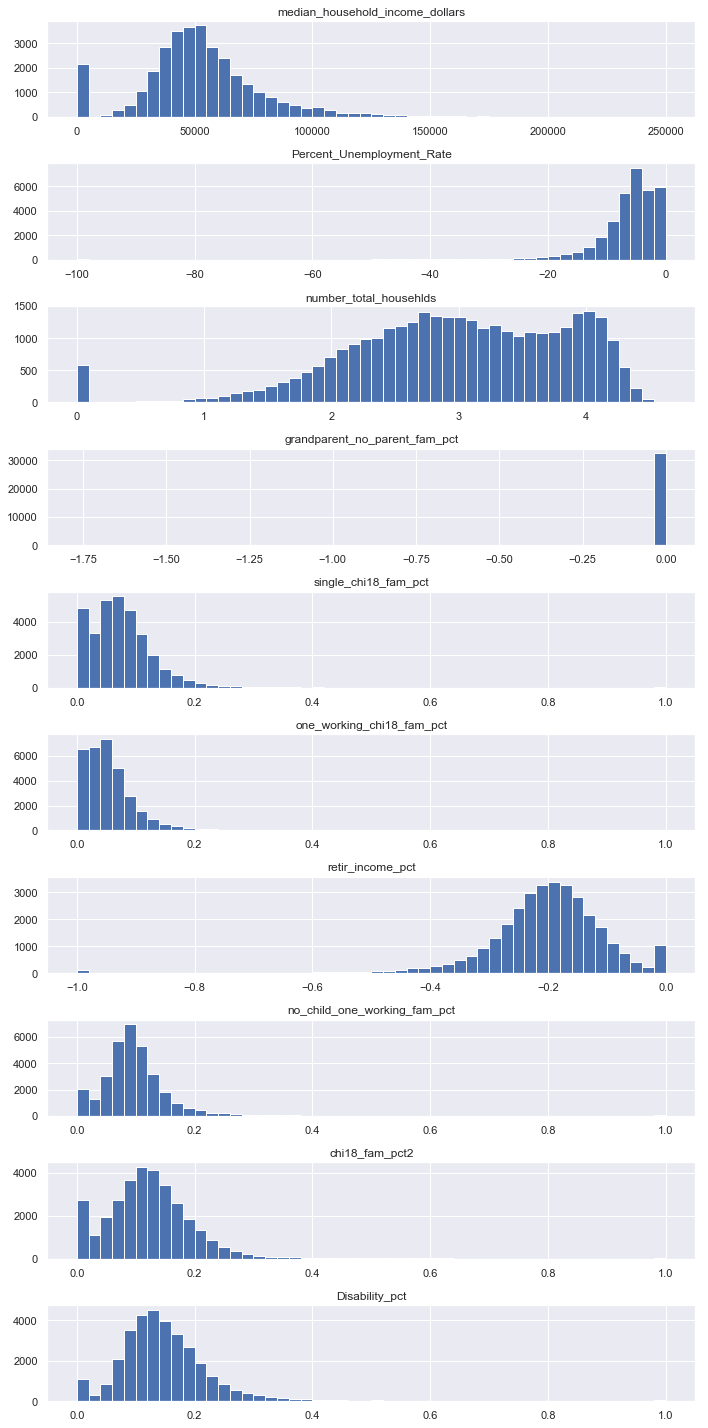

In [245]:
f, axes = plt.subplots(10, figsize=(10, 20))
for i,col in enumerate(set2_s.columns):
    axes[i].hist(set2_s[col], bins = 50)
    axes[i].set_title(col)
plt.tight_layout()

In [74]:
qset

median_household_income_dollars    101071.000000
Percent_Unemployment_Rate              16.300000
number_total_househlds              15149.000000
grandparent_no_parent_fam_pct           0.044025
single_chi18_fam_pct                    0.175600
one_working_chi18_fam_pct               0.141178
retir_income_pct                        0.366282
no_child_one_working_fam_pct            0.194554
chi18_fam_pct2                          0.243883
Disability_pct                          0.290309
Name: 0.95, dtype: float64

In [75]:
set3 = set2.copy()

In [76]:
for col in set3.columns:   
    set3[col][set3[col] > qset[col]] = qset[col]

C:\Users\qianm\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\qianm\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\qianm\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [246]:
## plot capped cols
# f, axes = plt.subplots(10, figsize=(10, 20))
# for i,col in enumerate(set3.columns):
#     axes[i].hist(set3[col], bins = 50)
#     axes[i].set_title(col)
# plt.tight_layout()

In [296]:
set3_s = set2.copy()

In [297]:
set3_s['number_total_househlds'] = set3_s['number_total_househlds'].apply(takelog)

In [305]:
qset1 = set2[(set2['median_household_income_dollars'] != 0) & (set2['number_total_househlds'] != 0)].quantile(0.95)

In [306]:
qset1

median_household_income_dollars    102459.500000
Percent_Unemployment_Rate              15.600000
number_total_househlds              15454.200000
grandparent_no_parent_fam_pct           0.043784
single_chi18_fam_pct                    0.171976
one_working_chi18_fam_pct               0.137931
retir_income_pct                        0.353846
no_child_one_working_fam_pct            0.187296
chi18_fam_pct2                          0.240179
Disability_pct                          0.289157
Name: 0.95, dtype: float64

In [313]:
qset2 = set3_s.quantile(0.95)

In [314]:
qset2

median_household_income_dollars    101071.000000
Percent_Unemployment_Rate              16.300000
number_total_househlds                  4.180384
grandparent_no_parent_fam_pct           0.044025
single_chi18_fam_pct                    0.175600
one_working_chi18_fam_pct               0.141178
retir_income_pct                        0.366282
no_child_one_working_fam_pct            0.194554
chi18_fam_pct2                          0.243883
Disability_pct                          0.290309
Name: 0.95, dtype: float64

In [310]:
qg = set2[(set2['median_household_income_dollars'] != 0) & (set2['number_total_househlds'] != 0) & (set2['Percent_Unemployment_Rate']!=0)]['grandparent_no_parent_fam_pct'].quantile(0.75)
qh = set2['']

In [315]:
qset2['grandparent_no_parent_fam_pct'] = qg

In [316]:
qset2

median_household_income_dollars    101071.000000
Percent_Unemployment_Rate              16.300000
number_total_househlds                  4.180384
grandparent_no_parent_fam_pct           0.012465
single_chi18_fam_pct                    0.175600
one_working_chi18_fam_pct               0.141178
retir_income_pct                        0.366282
no_child_one_working_fam_pct            0.194554
chi18_fam_pct2                          0.243883
Disability_pct                          0.290309
Name: 0.95, dtype: float64

In [317]:
for col in set3_s.columns:   
    set3_s[col][set3_s[col] > qset2[col]] = qset2[col]

C:\Users\qianm\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\qianm\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [320]:
set3_s.head()

,median_household_income_dollars,Percent_Unemployment_Rate,number_total_househlds,grandparent_no_parent_fam_pct,single_chi18_fam_pct,one_working_chi18_fam_pct,retir_income_pct,no_child_one_working_fam_pct,chi18_fam_pct2,Disability_pct
0,11757,16.3,3.764774,0.005156,0.148505,0.039017,0.143004,0.073737,0.081128,0.147622
1,16190,16.3,4.104453,0.006054,0.113138,0.048038,0.130042,0.086563,0.082947,0.078066
2,16645,16.3,4.180384,0.004577,0.147562,0.041664,0.158188,0.062970,0.079489,0.018597
3,13387,12.0,3.292034,0.012465,0.124043,0.051557,0.204186,0.112302,0.075549,0.106770
4,18741,14.7,3.959995,0.012465,0.108991,0.043969,0.164474,0.077522,0.088268,0.101301


C:\Users\qianm\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\qianm\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


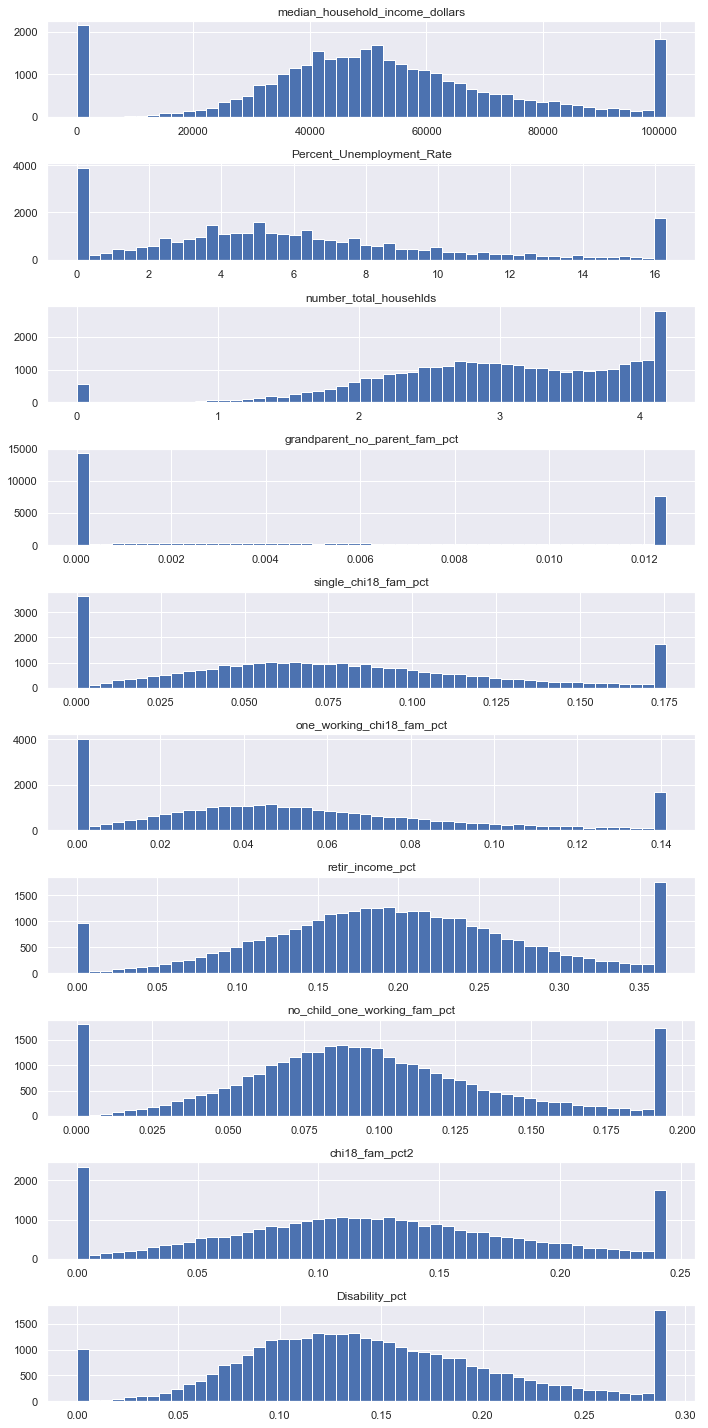

In [321]:
f, axes = plt.subplots(10, figsize=(10, 20))
for i,col in enumerate(set3_s.columns):
    axes[i].hist(set3_s[col], bins = 50)
    axes[i].set_title(col)
plt.tight_layout()

In [277]:
set3_s['grandparent_no_parent_fam_pct']>0.5
set3_s.loc[k1]

,median_household_income_dollars,Percent_Unemployment_Rate,number_total_househlds,grandparent_no_parent_fam_pct,single_chi18_fam_pct,one_working_chi18_fam_pct,retir_income_pct,no_child_one_working_fam_pct,chi18_fam_pct2,Disability_pct
6869,81096,3.6,160,0.600000,0.000000,0.000000,0.218750,0.018750,0.031250,0.083168
7089,55446,0.0,85,0.717647,0.000000,0.105882,0.458824,0.047059,0.000000,0.123781
10027,0,0.0,30,0.733333,0.000000,0.000000,0.700000,0.700000,0.000000,0.236592
10150,25000,0.0,22,0.545455,0.000000,0.045455,0.000000,0.000000,0.136364,0.188733
11662,0,0.0,23,1.695652,0.000000,0.000000,0.000000,0.000000,0.000000,0.168696
11844,36042,7.5,67,0.791045,0.074627,0.029851,0.358209,0.074627,0.029851,0.136057
13489,25500,5.8,350,0.505714,0.000000,0.000000,0.042857,0.085714,0.077143,0.319315
13955,0,0.0,17,1.235294,0.000000,0.000000,0.000000,0.000000,0.000000,0.903226
21953,0,0.0,25,0.640000,0.000000,0.000000,0.560000,0.000000,0.000000,0.166485
22101,14688,0.0,25,1.200000,0.120000,0.000000,0.240000,0.000000,0.080000,0.163805


In [ ]:
for col in set3.columns:   
    set3[col][set3[col] > qset[col]] = qset[col]

In [88]:
# negative scale
set3['Percent_Unemployment_Rate'] = set3['Percent_Unemployment_Rate'].apply(lambda x:-x)

In [184]:
set3['retir_income_pct'] = set3['retir_income_pct'].apply(lambda x:-x)

In [185]:
set3.head()

,median_household_income_dollars,Percent_Unemployment_Rate,number_total_househlds,grandparent_no_parent_fam_pct,single_chi18_fam_pct,one_working_chi18_fam_pct,retir_income_pct,no_child_one_working_fam_pct,chi18_fam_pct2,Disability_pct
0,11757,-16.3,5818.0,0.005156,0.148505,0.039017,-0.143004,0.073737,0.081128,0.147622
1,16190,-16.3,12719.0,0.006054,0.113138,0.048038,-0.130042,0.086563,0.082947,0.078066
2,16645,-16.3,15149.0,0.004577,0.147562,0.041664,-0.158188,0.062970,0.079489,0.018597
3,13387,-12.0,1959.0,0.044025,0.124043,0.051557,-0.204186,0.112302,0.075549,0.106770
4,18741,-14.7,9120.0,0.018969,0.108991,0.043969,-0.164474,0.077522,0.088268,0.101301


In [186]:
scaler = preprocessing.MinMaxScaler(feature_range=(0,10))
scaled = scaler.fit_transform(set3)
set3_scaled = pd.DataFrame(scaled, columns=set3.columns)

C:\Users\qianm\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [187]:
set3_scaled = pd.DataFrame(scaled, columns=set3.columns)

In [188]:
set3_scaled.head()

,median_household_income_dollars,Percent_Unemployment_Rate,number_total_househlds,grandparent_no_parent_fam_pct,single_chi18_fam_pct,one_working_chi18_fam_pct,retir_income_pct,no_child_one_working_fam_pct,chi18_fam_pct2,Disability_pct
0,1.163242,0.000000,3.840518,1.171233,8.456986,2.763671,6.095782,3.790037,3.326491,5.085004
1,1.601844,0.000000,8.395934,1.375098,6.442930,3.402690,6.449684,4.449326,3.401086,2.689065
2,1.646862,0.000000,10.000000,1.039575,8.403286,2.951210,5.681244,3.236643,3.259292,0.640584
3,1.324514,2.638037,1.293155,10.000000,7.063947,3.651919,4.425447,5.772290,3.097743,3.677818
4,1.854241,0.981595,6.020199,4.308709,6.206791,3.114467,5.509643,3.984598,3.619255,3.489439


C:\Users\qianm\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\qianm\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


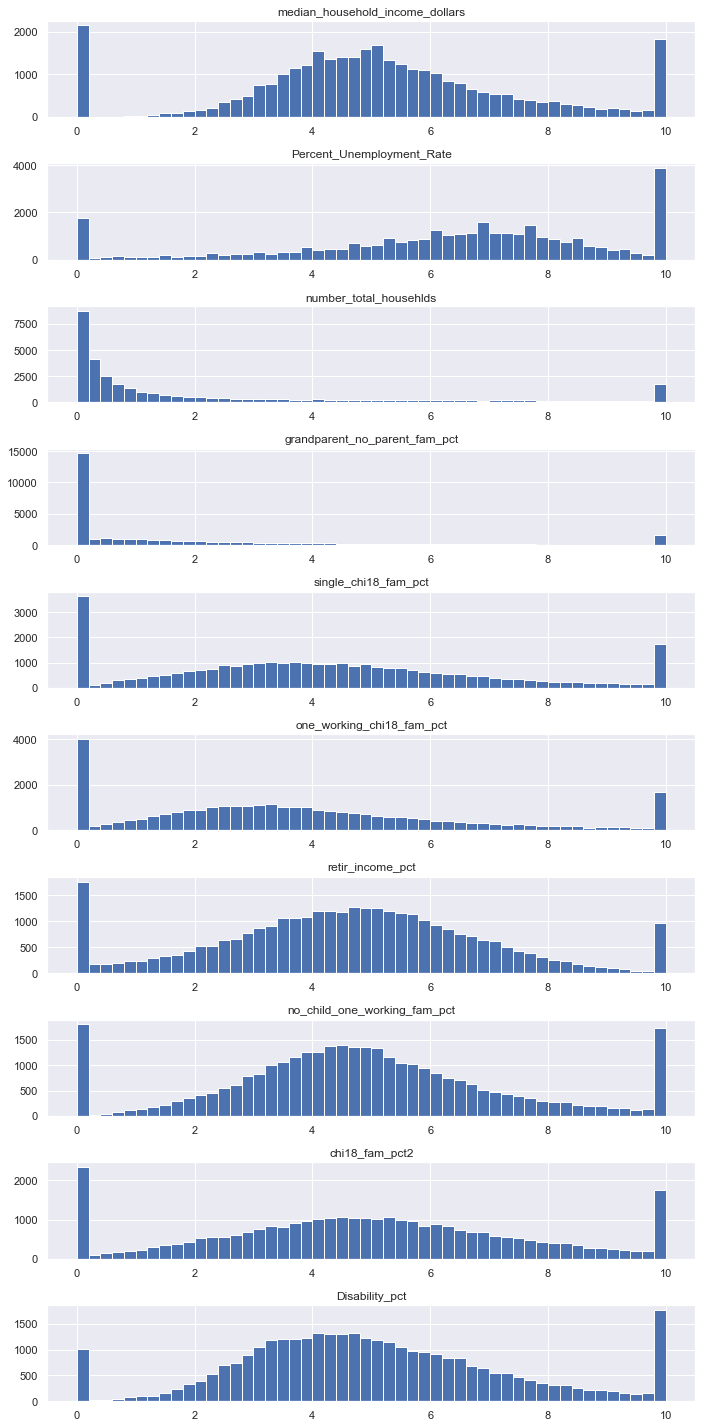

In [189]:
# plot scaled
f, axes = plt.subplots(10, figsize=(10, 20))
for i,col in enumerate(set3_scaled.columns):
    axes[i].hist(set3_scaled[col], bins = 50)
    axes[i].set_title(col)
plt.tight_layout()

In [132]:
# assign weight
def weight(k,list1):
    sumk = 0
    for a,b in enumerate(list1):
        sumk += k[a]*b
    return sumk

In [190]:
a = set3_scaled.apply(weight, list1 = [1/9]*3+[1/18]*6+[1/3], axis = 1)

In [191]:
b = set3_scaled.apply(weight, list1 = [1/8]*2+[1/4]+[1/24]*6+[1/4], axis = 1)

In [192]:
c = set3_scaled.apply(weight, list1 = [1/10]*10, axis = 1)

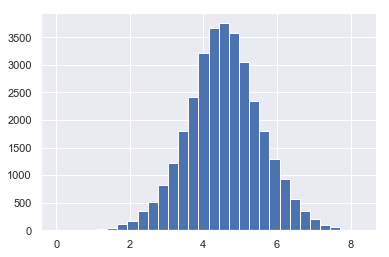

In [193]:
a.hist(bins = 30)

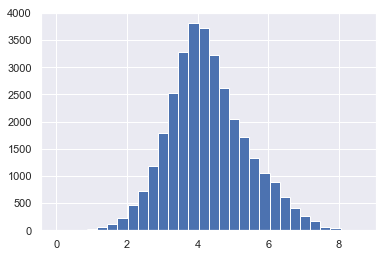

In [194]:
b.hist(bins = 30)

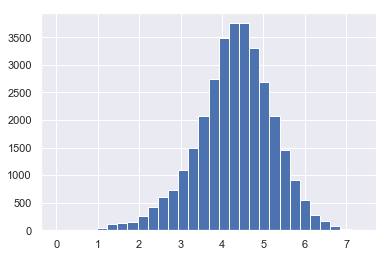

In [195]:
c.hist(bins = 30)

In [196]:
set4 = set3_scaled.join(set1.select_dtypes(include=['object']))

In [197]:
set4['all_equal_weight_score'] = c

In [198]:
set4['a_score'] = a

In [199]:
set4['b_score'] = b

In [200]:
set4.head()

,median_household_income_dollars,Percent_Unemployment_Rate,number_total_househlds,grandparent_no_parent_fam_pct,single_chi18_fam_pct,one_working_chi18_fam_pct,retir_income_pct,no_child_one_working_fam_pct,chi18_fam_pct2,Disability_pct,zip,county,statename,all_equal_weight_score,a_score,b_score
0,1.163242,0.000000,3.840518,1.171233,8.456986,2.763671,6.095782,3.790037,3.326491,5.085004,00601,NaN,NaN,3.569296,3.673430,3.443627
1,1.601844,0.000000,8.395934,1.375098,6.442930,3.402690,6.449684,4.449326,3.401086,2.689065,00602,NaN,NaN,3.820766,3.425042,4.034847
2,1.646862,0.000000,10.000000,1.039575,8.403286,2.951210,5.681244,3.236643,3.259292,0.640584,00603,NaN,NaN,3.685870,2.872693,3.889806
3,1.324514,2.638037,1.293155,10.000000,7.063947,3.651919,4.425447,5.772290,3.097743,3.677818,00606,NaN,NaN,4.294487,3.699426,3.155202
4,1.854241,0.981595,6.020199,4.308709,6.206791,3.114467,5.509643,3.984598,3.619255,3.489439,00610,NaN,NaN,3.908894,3.632898,3.846200


In [204]:
set5 = set4.select_dtypes(exclude = ['object'])

In [205]:
set5.head()

,median_household_income_dollars,Percent_Unemployment_Rate,number_total_househlds,grandparent_no_parent_fam_pct,single_chi18_fam_pct,one_working_chi18_fam_pct,retir_income_pct,no_child_one_working_fam_pct,chi18_fam_pct2,Disability_pct,all_equal_weight_score,a_score,b_score
0,1.163242,0.000000,3.840518,1.171233,8.456986,2.763671,6.095782,3.790037,3.326491,5.085004,3.569296,3.673430,3.443627
1,1.601844,0.000000,8.395934,1.375098,6.442930,3.402690,6.449684,4.449326,3.401086,2.689065,3.820766,3.425042,4.034847
2,1.646862,0.000000,10.000000,1.039575,8.403286,2.951210,5.681244,3.236643,3.259292,0.640584,3.685870,2.872693,3.889806
3,1.324514,2.638037,1.293155,10.000000,7.063947,3.651919,4.425447,5.772290,3.097743,3.677818,4.294487,3.699426,3.155202
4,1.854241,0.981595,6.020199,4.308709,6.206791,3.114467,5.509643,3.984598,3.619255,3.489439,3.908894,3.632898,3.846200


In [201]:
set4.to_csv('C:\\Qianmei_STAT\\Datapalooza\\Data\\scaled var and final score.csv')

In [202]:
set3_scaled.join(set1.select_dtypes(include=['object'])).to_csv('C:\\Qianmei_STAT\\Datapalooza\\Data\\scaled var.csv')

C:\Users\qianm\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\qianm\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


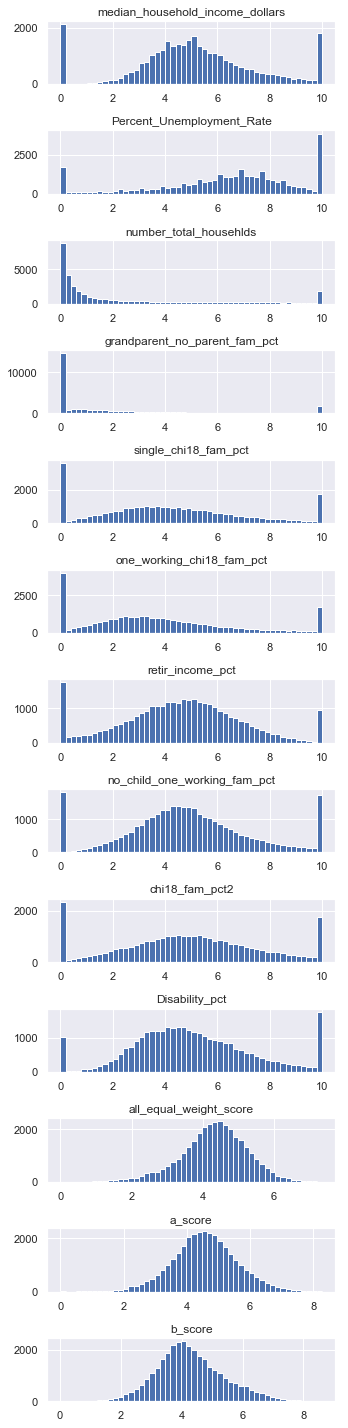

In [206]:
f2, axes = plt.subplots(13, figsize=(5, 20))
for i,col in enumerate(set5.columns):
    axes[i].hist(set5[col], bins = 50)
    axes[i].set_title(col)
plt.tight_layout()

In [210]:
set4[['b_score','a_score','all_equal_weight_score','number_total_househlds']].describe()

,b_score,a_score,all_equal_weight_score,number_total_househlds
count,32420.000000,32420.000000,32420.000000,32989.000000
mean,4.284106,4.560334,4.301309,2.260902
std,1.114234,1.002462,0.922276,3.004868
min,0.013367,0.005941,0.005347,0.000000
25%,3.548715,3.923665,3.767637,0.181530
50%,4.172380,4.552773,4.352494,0.707637
75%,4.953503,5.200471,4.911990,3.309789
max,8.617773,8.277476,7.347379,10.000000


In [216]:
set2[set2.isnull().any(axis=1)]

,median_household_income_dollars,Percent_Unemployment_Rate,number_total_househlds,grandparent_no_parent_fam_pct,single_chi18_fam_pct,one_working_chi18_fam_pct,retir_income_pct,no_child_one_working_fam_pct,chi18_fam_pct2,Disability_pct
108,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.163030
110,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.182090
111,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.178218
117,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.173913
166,0,6.5,0,NaN,NaN,NaN,NaN,NaN,NaN,0.111634
184,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.122923
206,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.157602
419,0,50.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.049405
536,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.089606
550,0,0.5,0,NaN,NaN,NaN,NaN,NaN,NaN,0.130639


In [217]:
set2['Disability_pct'].describe()

count    32989.000000
mean         0.152263
std          0.088147
min          0.000000
25%          0.101887
50%          0.139569
75%          0.186024
max          1.000000
Name: Disability_pct, dtype: float64

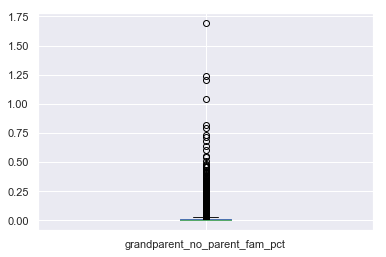

In [53]:
# f3, axes = plt.subplots(10, figsize=(5, 20))
# for i,col in enumerate(set2.columns):
#     axes[i].boxplot(set2[col])
#     axes[i].set_title(col)
# plt.tight_layout()
set2.iloc[:,3].plot.box()

In [43]:
scaler = preprocessing.StandardScaler()
scaled = scaler.fit_transform(set2)

C:\Users\qianm\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\qianm\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [44]:
set2_scaled = pd.DataFrame(scaled, columns=set2.columns)

In [45]:
set2_scaled.head()

,median_household_income_dollars,Percent_Unemployment_Rate,number_total_househlds,grandparent_no_parent_fam_pct,single_chi18_fam_pct,one_working_chi18_fam_pct,retir_income_pct,no_child_one_working_fam_pct,chi18_fam_pct2,Disability_pct
0,-1.515369,5.460466,0.417682,-0.183164,1.098992,-0.311558,-0.577156,-0.372362,-0.534898,-0.052651
1,-1.352811,1.769525,1.738831,-0.154215,0.553189,-0.156643,-0.699259,-0.188192,-0.511817,-0.841756
2,-1.336127,2.523419,2.943007,-0.201859,1.084440,-0.266094,-0.434132,-0.526950,-0.555690,-1.516425
3,-1.455597,0.874276,-0.321096,1.181724,0.721483,-0.096224,-0.000857,0.181372,-0.605677,-0.516109
4,-1.259267,1.298341,1.049827,0.262358,0.489196,-0.226516,-0.374926,-0.318012,-0.444311,-0.578152


C:\Users\qianm\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\qianm\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


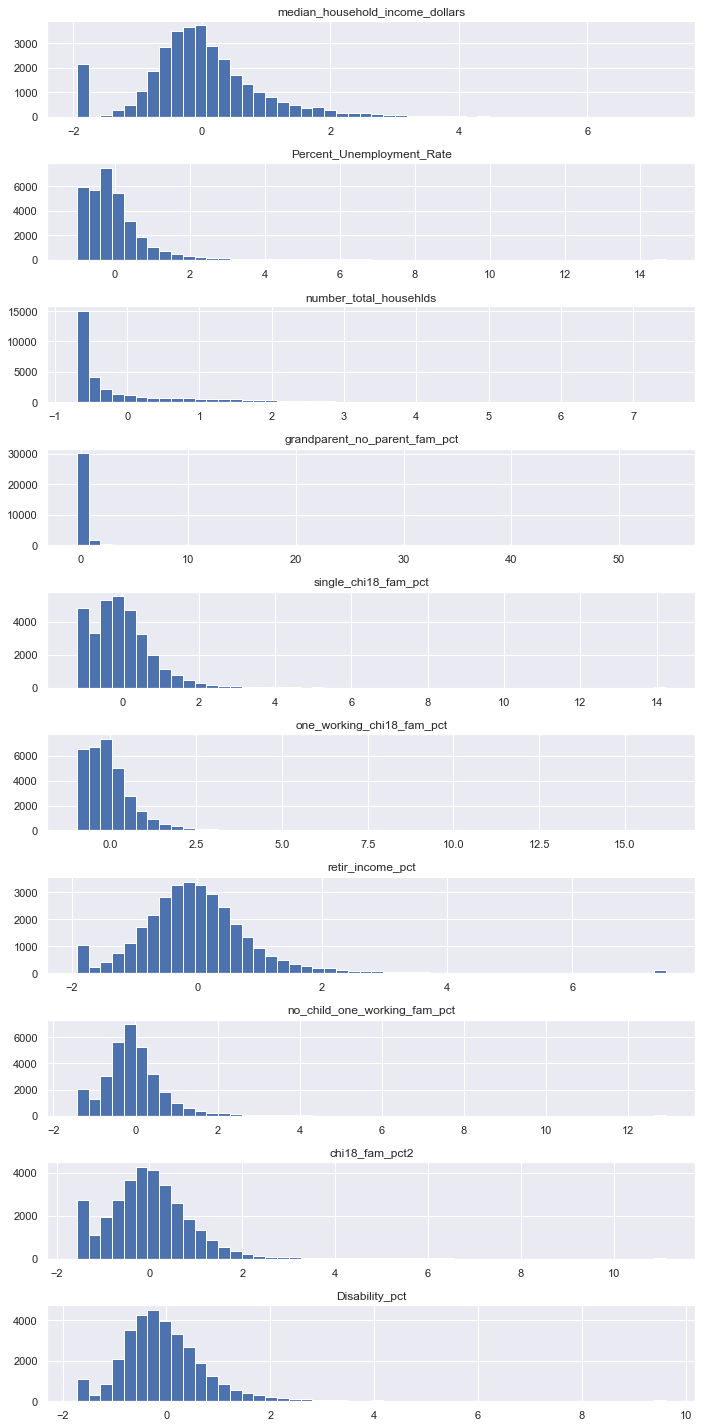

In [46]:
f2, axes = plt.subplots(10, figsize=(10, 20))
for i,col in enumerate(set2_scaled.columns):
    axes[i].hist(set2_scaled[col], bins = 50)
    axes[i].set_title(col)
plt.tight_layout()

In [326]:
set2.head()

,median_household_income_dollars,Percent_Unemployment_Rate,number_total_househlds,grandparent_no_parent_fam_pct,single_chi18_fam_pct,one_working_chi18_fam_pct,retir_income_pct,no_child_one_working_fam_pct,chi18_fam_pct2,Disability_pct
0,11757,41.2,5818,0.005156,0.148505,0.039017,0.143004,0.073737,0.081128,0.147622
1,16190,17.7,12719,0.006054,0.113138,0.048038,0.130042,0.086563,0.082947,0.078066
2,16645,22.5,19009,0.004577,0.147562,0.041664,0.158188,0.062970,0.079489,0.018597
3,13387,12.0,1959,0.047473,0.124043,0.051557,0.204186,0.112302,0.075549,0.106770
4,18741,14.7,9120,0.018969,0.108991,0.043969,0.164474,0.077522,0.088268,0.101301


In [419]:
setn = set2.copy()

In [420]:
setn.head()

,median_household_income_dollars,Percent_Unemployment_Rate,number_total_househlds,grandparent_no_parent_fam_pct,single_chi18_fam_pct,one_working_chi18_fam_pct,retir_income_pct,no_child_one_working_fam_pct,chi18_fam_pct2,Disability_pct
0,11757,41.2,5818,0.005156,0.148505,0.039017,0.143004,0.073737,0.081128,0.147622
1,16190,17.7,12719,0.006054,0.113138,0.048038,0.130042,0.086563,0.082947,0.078066
2,16645,22.5,19009,0.004577,0.147562,0.041664,0.158188,0.062970,0.079489,0.018597
3,13387,12.0,1959,0.047473,0.124043,0.051557,0.204186,0.112302,0.075549,0.106770
4,18741,14.7,9120,0.018969,0.108991,0.043969,0.164474,0.077522,0.088268,0.101301


In [369]:
def winsoriz_my(s, limit):
    a = s.quantile(limit[0])
    b = s.quantile(limit[1])
    return s.clip(lower=a, upper=b)

In [421]:
setn['number_total_househlds'] = winsoriz_my(setn['number_total_househlds'].apply(takelog),(0.03,1))

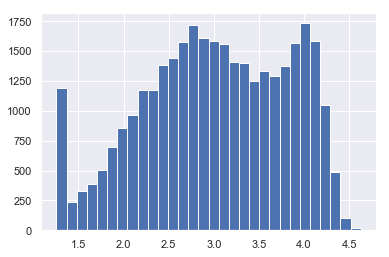

In [422]:
setn['number_total_househlds'].hist(bins = 30)

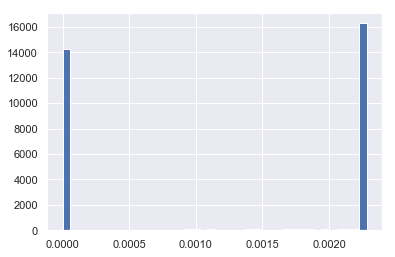

In [409]:
winsoriz_my(setn['grandparent_no_parent_fam_pct'],(0,0.5)).hist(bins = 40)

In [602]:
setn1 = setn.drop('grandparent_no_parent_fam_pct', axis = 1)

In [603]:
setn2 = setn1.drop('number_total_househlds', axis = 1).apply(winsoriz_my,  axis = 0, limit = (0,0.95)).join(setn['number_total_househlds'])

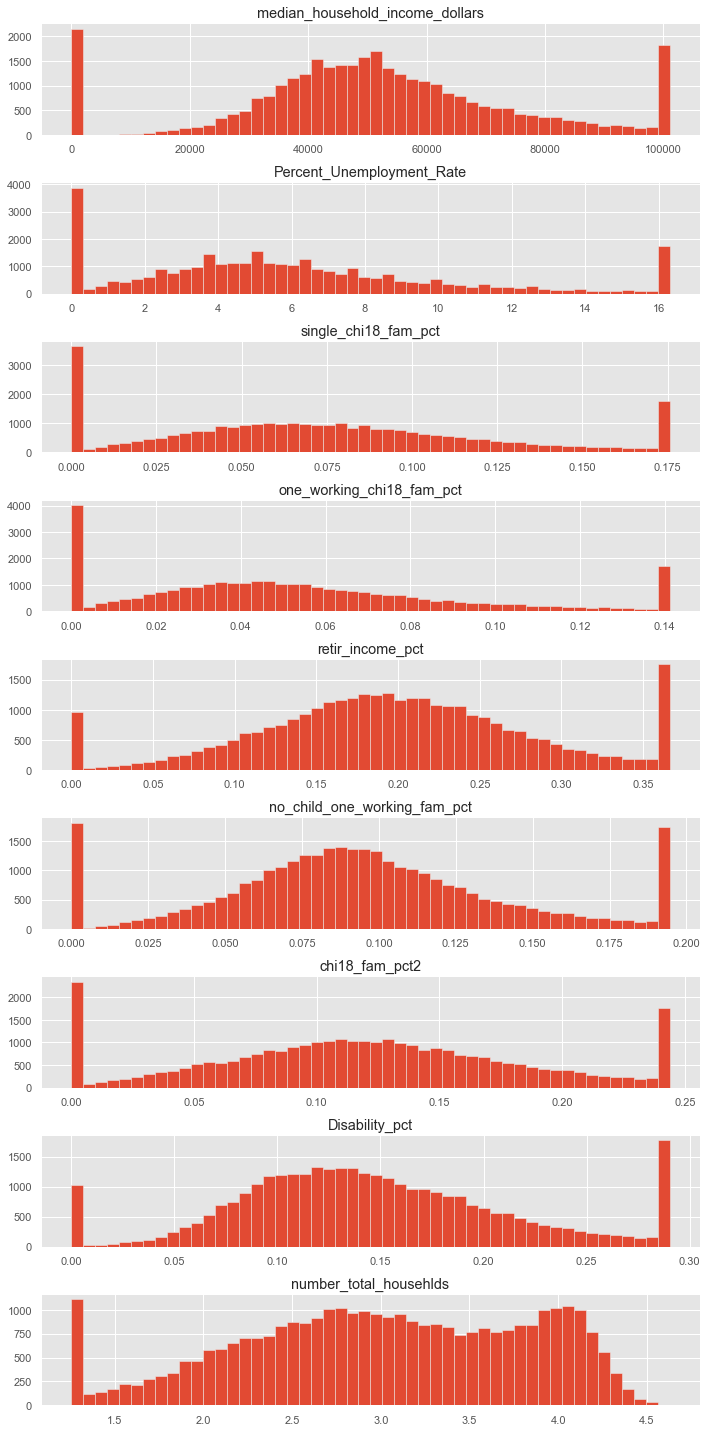

In [604]:
plotall2(9,setn2)

In [607]:
setn2['Percent_Unemployment_Rate'] = setn2['Percent_Unemployment_Rate'].apply(lambda x:-x)
setn2['retir_income_pct'] = setn2['retir_income_pct'].apply(lambda x:-x)

In [608]:
scaler = preprocessing.MinMaxScaler(feature_range=(0,10))
scaled = scaler.fit_transform(setn2)
setn2_scaled = pd.DataFrame(scaled, columns=setn2.columns)

In [596]:
def plotall2(k,df):
    f2, axes = plt.subplots(k, figsize=(10, 20))
    for i,col in enumerate(df.columns):
        axes[i].hist(df[col], bins = 50)
        axes[i].set_title(col)
    plt.tight_layout()

In [429]:
def plotall(df):
    f2, axes = plt.subplots(10, figsize=(10, 20))
    for i,col in enumerate(df.columns):
        axes[i].hist(df[col], bins = 50)
        axes[i].set_title(col)
    plt.tight_layout()

C:\Users\qianm\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\qianm\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


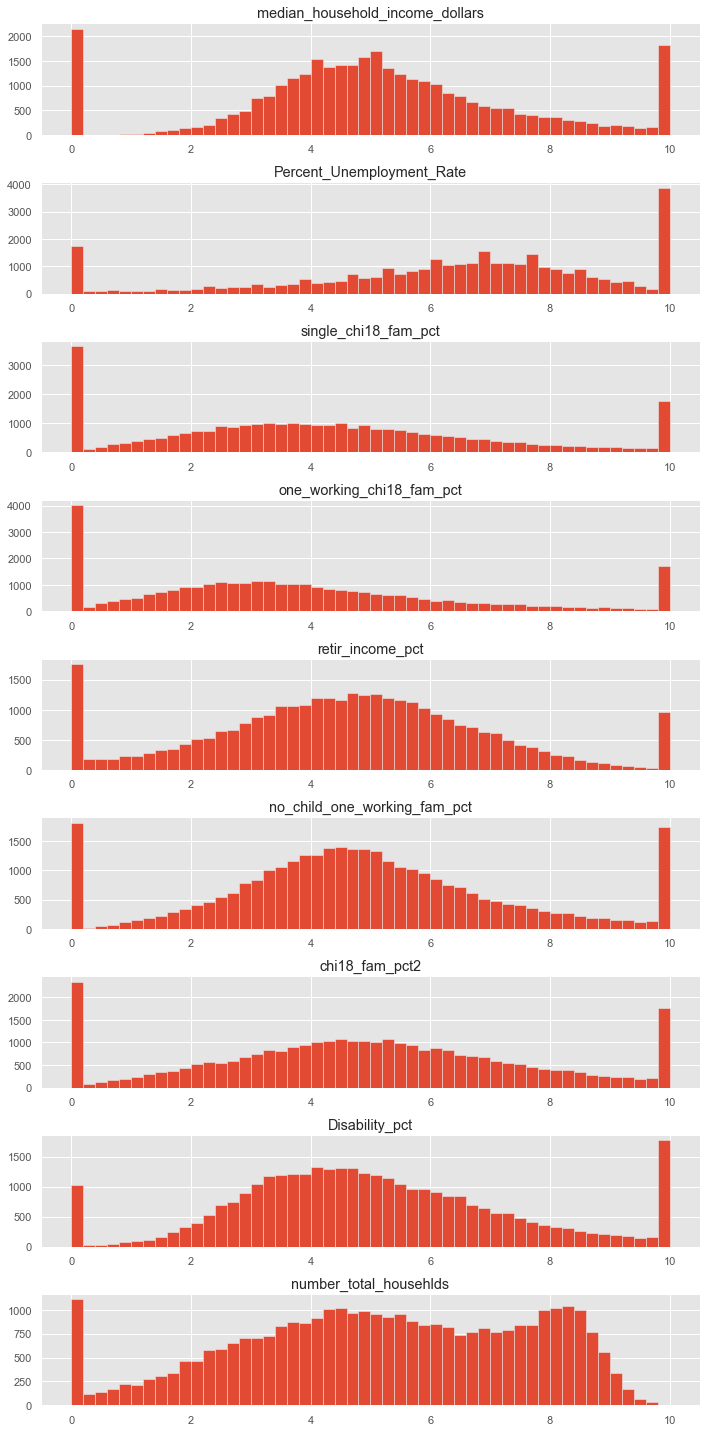

In [609]:
plotall2(9,setn2_scaled)

In [432]:
a1_equal_weight = setn2_scaled.apply(weight, list1 = [1/9]*9, axis = 1)

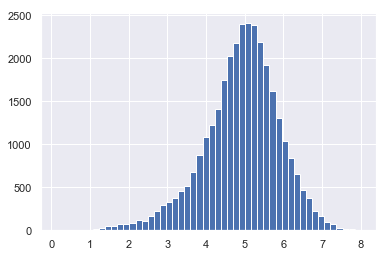

In [434]:
a1_equal_weight.hist(bins = 50)

0    4.235543
1    4.098020
2    3.864661
3    4.187677
4    4.086375
dtype: float64

In [438]:
setn2_scaled.head().apply(sum, axis = 1)

0    38.119887
1    36.882179
2    34.781948
3    37.689094
4    36.777378
dtype: float64

In [440]:
a1_equal_weight.max()


7.995577464477731

In [441]:
a2 = setn2_scaled.apply(weight, list1 = [1/8]*2+[1/20]*5+[1/4]+[1/4], axis = 1)

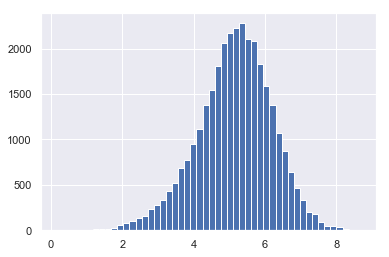

In [442]:
a2.hist(bins = 50)

In [443]:
a2.max()

8.685588338367019

In [446]:
a3 = setn2_scaled.apply(weight, list1 = [1/9]*2+[1/15]*5+[1/3]+[1/9], axis = 1)

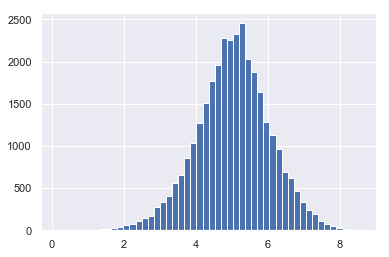

In [447]:
a3.hist(bins = 50)

In [445]:
a3.max()

8.584341149875332

In [448]:
a4 = setn2_scaled.apply(weight, list1 = [1/4]*2+[1/14]*7, axis = 1)

In [449]:
a4.max()

8.546371030363964

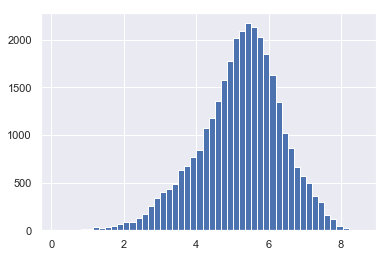

In [451]:
a4.hist(bins = 50)

In [454]:
setn2_scaled['score1_all_equal'] = a1_equal_weight
setn2_scaled['score2_compo2'] = a4
setn2_scaled['score3_compo3'] = a3
setn2_scaled['score4_compo4'] = a2

In [456]:
setn3 = setn2_scaled.join(set1.select_dtypes(include=['object']))

In [457]:
setn3.head()

,median_household_income_dollars,Percent_Unemployment_Rate,single_chi18_fam_pct,one_working_chi18_fam_pct,retir_income_pct,no_child_one_working_fam_pct,chi18_fam_pct2,Disability_pct,number_total_househlds,score1_all_equal,score2_compo2,score3_compo3,score4_compo4,zip,county,statename
0,1.163242,0.000000,8.456986,2.763671,6.095782,3.790037,3.326491,5.085004,7.438675,4.235543,2.930571,4.279634,4.497973,00601,NaN,NaN
1,1.601844,0.000000,6.442930,3.402690,6.449684,4.449326,3.401086,2.689065,8.445554,4.098020,2.920485,3.622447,4.191171,00602,NaN,NaN
2,1.646862,0.000000,8.403286,2.951210,5.681244,3.236643,3.259292,0.640584,8.962826,3.864661,2.778507,2.961161,3.783294,00603,NaN,NaN
3,1.324514,2.638037,7.063947,3.651919,4.425447,5.772290,3.097743,3.677818,6.037379,4.187677,3.399677,3.937799,4.124686,00606,NaN,NaN
4,1.854241,0.981595,6.206791,3.114467,5.509643,3.984598,3.619255,3.489439,8.017351,4.086375,3.133355,3.864706,4.352915,00610,NaN,NaN


In [459]:
setn3.to_csv('C:\Qianmei_STAT\Datapalooza\Data\\Scaled features and predicted Score.csv')

In [460]:
# clustering
from sklearn.cluster import KMeans

In [461]:
setn1.head()

,median_household_income_dollars,Percent_Unemployment_Rate,number_total_househlds,single_chi18_fam_pct,one_working_chi18_fam_pct,retir_income_pct,no_child_one_working_fam_pct,chi18_fam_pct2,Disability_pct
0,11757,41.2,3.764774,0.148505,0.039017,0.143004,0.073737,0.081128,0.147622
1,16190,17.7,4.104453,0.113138,0.048038,0.130042,0.086563,0.082947,0.078066
2,16645,22.5,4.278959,0.147562,0.041664,0.158188,0.062970,0.079489,0.018597
3,13387,12.0,3.292034,0.124043,0.051557,0.204186,0.112302,0.075549,0.106770
4,18741,14.7,3.959995,0.108991,0.043969,0.164474,0.077522,0.088268,0.101301


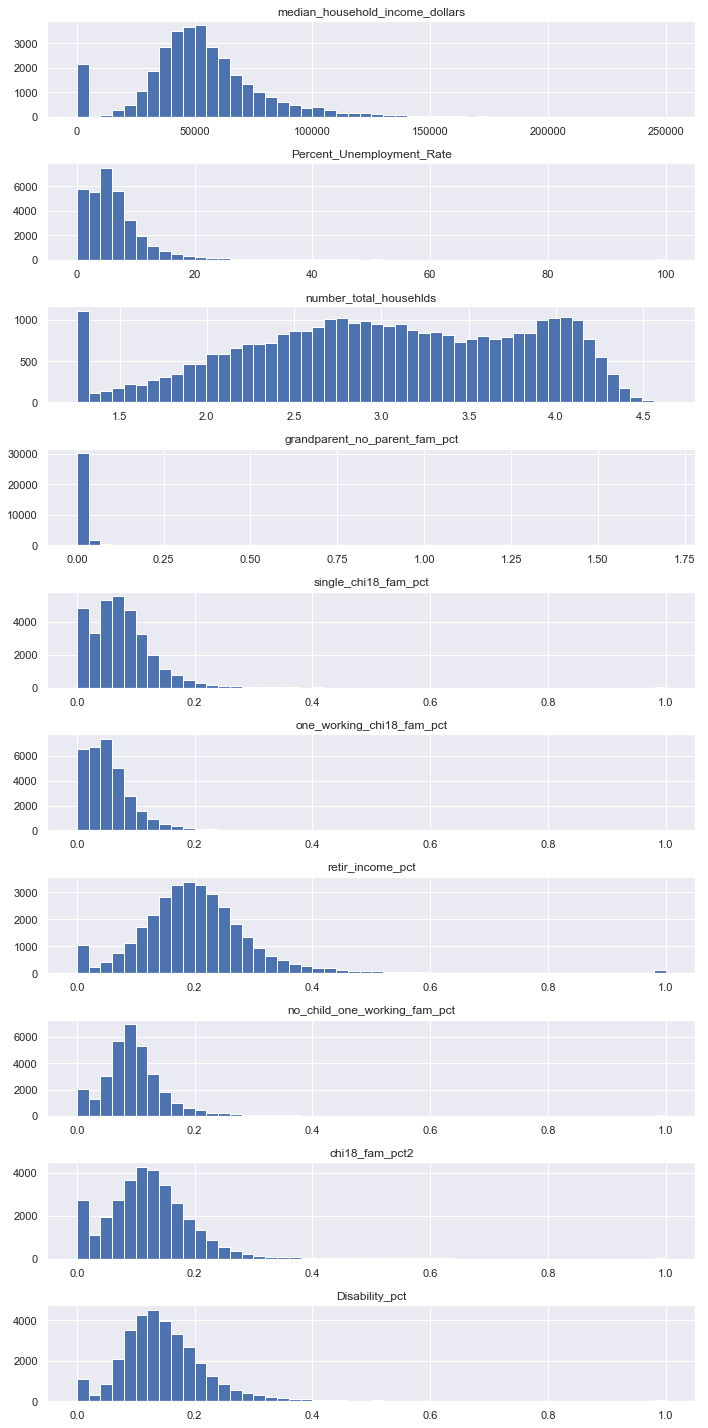

In [463]:
plotall(setn)

In [502]:
kmeans = KMeans(n_clusters=20)

In [526]:
scaler2 = preprocessing.StandardScaler()


In [527]:
X = setn.drop('grandparent_no_parent_fam_pct', axis = 1)
X_scaled = pd.DataFrame(scaler2.fit_transform(X), columns = X.columns).dropna()

C:\Users\qianm\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\qianm\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [517]:
X_scaled.head()

,median_household_income_dollars,Percent_Unemployment_Rate,number_total_househlds,single_chi18_fam_pct,one_working_chi18_fam_pct,retir_income_pct,no_child_one_working_fam_pct,chi18_fam_pct2,Disability_pct
0,-1.515369,5.460466,0.935309,1.098992,-0.311558,-0.577156,-0.372362,-0.534898,-0.052651
1,-1.352811,1.769525,1.357934,0.553189,-0.156643,-0.699259,-0.188192,-0.511817,-0.841756
2,-1.336127,2.523419,1.575053,1.084440,-0.266094,-0.434132,-0.526950,-0.555690,-1.516425
3,-1.455597,0.874276,0.347131,0.721483,-0.096224,-0.000857,0.181372,-0.605677,-0.516109
4,-1.259267,1.298341,1.178201,0.489196,-0.226516,-0.374926,-0.318012,-0.444311,-0.578152


In [518]:
#plotall(X_scaled)

In [519]:
kmeans.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=20, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [520]:
len(kmeans.labels_)

32420

In [521]:
X_scaled['cluster_label'] = kmeans.labels_

In [522]:
setn_cl = setn.join(X_scaled['cluster_label'])

In [524]:
setn_cl[setn_cl.isna().any(axis = 1)].shape

(569, 11)

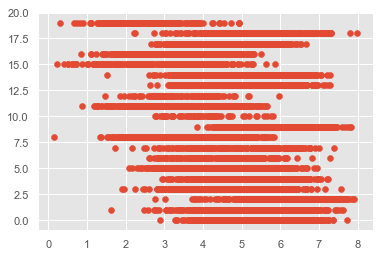

In [610]:
plt.scatter(x = setn3['score1_all_equal'], y = setn_cl['cluster_label'] )

In [539]:
def cluster_ana(cluster_number, score):
    kmeans = KMeans(n_clusters=cluster_number)
    kmeans.fit(X_scaled)
    ss = X_scaled.copy()
    ss['cluster_label'] = kmeans.labels_
    setn_cl = setn.join(ss['cluster_label'])
    plt.scatter(x = setn3[score], y = setn_cl['cluster_label'] )
    return setn_cl['cluster_label']

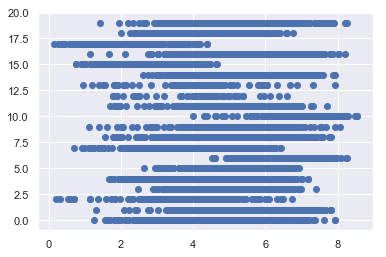

In [540]:
kmeans_s2 = cluster_ana(20, score = 'score2_compo2')

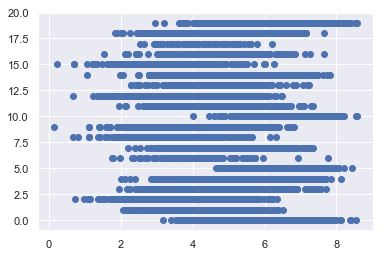

In [546]:
kmeans_s3 = cluster_ana(20, score = 'score3_compo3')

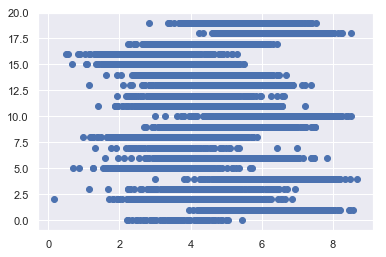

In [550]:
kmeans_s4 = cluster_ana(20, score = 'score4_compo4')

In [553]:
def DBSCAN(eps, min_samples):
    db = DBSCAN(eps=eps, min_samples = min_samples).fit(X_scaled)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    ss = X_scaled.copy()
    ss['cluster_label'] = db.labels_
    setn_cl = setn.join(ss['cluster_label'])
    plt.scatter(x = setn3[score], y = setn_cl['cluster_label'] )
    return setn_cl['cluster_label']

In [561]:
#DB_s2 = DBSCAN(20,1000)

RecursionError: maximum recursion depth exceeded

C:\Users\qianm\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\qianm\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


IndexError: index 10 is out of bounds for axis 0 with size 10

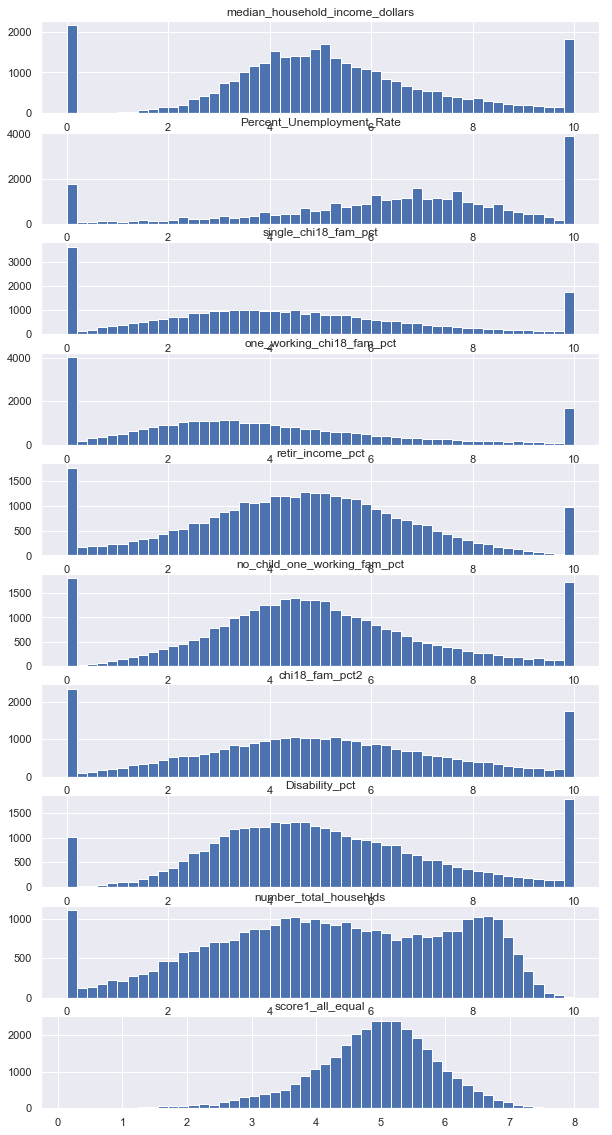

In [563]:
plotall(setn2_scaled)

In [574]:
X2_scaled = setn2_scaled.drop(['score1_all_equal', 'score2_compo2', 'score3_compo3', 'score4_compo4'],axis = 1).dropna()

In [587]:
km_label_set = cluster_ana2(20, X2_scaled)

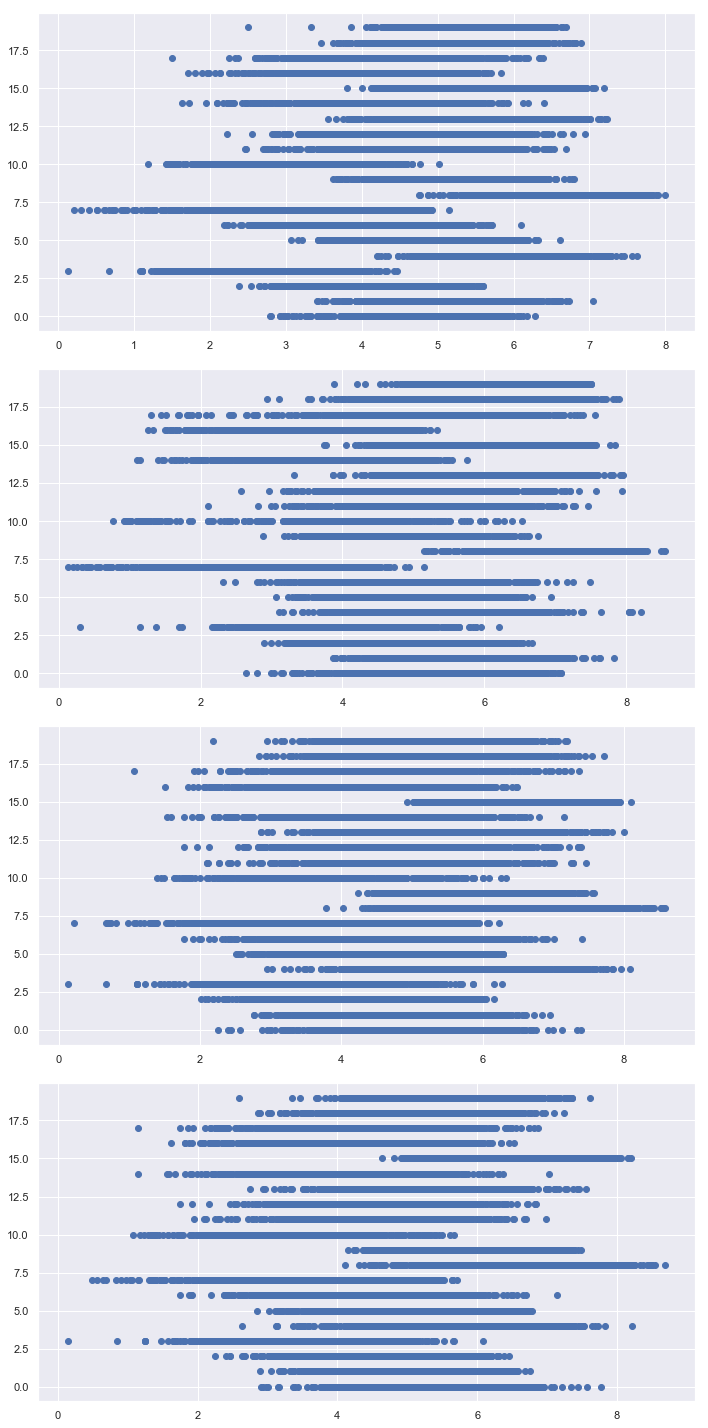

In [588]:
fig, axes = plt.subplots(4, figsize = (10,20))
for i,col in enumerate(['score1_all_equal', 'score2_compo2', 'score3_compo3', 'score4_compo4']):
    axes[i].scatter(x = col, y = 'cluster_label', data = km_label_set)
plt.tight_layout()

In [590]:
km_label_set[km_label_set.isnull().any(axis = 1)]

,median_household_income_dollars,Percent_Unemployment_Rate,single_chi18_fam_pct,one_working_chi18_fam_pct,retir_income_pct,no_child_one_working_fam_pct,chi18_fam_pct2,Disability_pct,number_total_househlds,score1_all_equal,score2_compo2,score3_compo3,score4_compo4,cluster_label
108,0.0,10.000000,NaN,NaN,NaN,NaN,NaN,5.615728,0.0,NaN,NaN,NaN,NaN,NaN
110,0.0,10.000000,NaN,NaN,NaN,NaN,NaN,6.272287,0.0,NaN,NaN,NaN,NaN,NaN
111,0.0,10.000000,NaN,NaN,NaN,NaN,NaN,6.138905,0.0,NaN,NaN,NaN,NaN,NaN
117,0.0,10.000000,NaN,NaN,NaN,NaN,NaN,5.990622,0.0,NaN,NaN,NaN,NaN,NaN
166,0.0,6.012270,NaN,NaN,NaN,NaN,NaN,3.845370,0.0,NaN,NaN,NaN,NaN,NaN
184,0.0,10.000000,NaN,NaN,NaN,NaN,NaN,4.234225,0.0,NaN,NaN,NaN,NaN,NaN
206,0.0,10.000000,NaN,NaN,NaN,NaN,NaN,5.428786,0.0,NaN,NaN,NaN,NaN,NaN
419,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,1.701800,0.0,NaN,NaN,NaN,NaN,NaN
536,0.0,10.000000,NaN,NaN,NaN,NaN,NaN,3.086566,0.0,NaN,NaN,NaN,NaN,NaN
550,0.0,9.693252,NaN,NaN,NaN,NaN,NaN,4.500005,0.0,NaN,NaN,NaN,NaN,NaN


In [592]:
km_label_set.to_csv('C:\\Qianmei_STAT\\Datapalooza\\Data\\Predicted Score with cluster label.csv')

In [567]:
setn2_scaled.columns

Index(['median_household_income_dollars', 'Percent_Unemployment_Rate',
       'single_chi18_fam_pct', 'one_working_chi18_fam_pct', 'retir_income_pct',
       'no_child_one_working_fam_pct', 'chi18_fam_pct2', 'Disability_pct',
       'number_total_househlds', 'score1_all_equal', 'score2_compo2',
       'score3_compo3', 'score4_compo4'],
      dtype='object')

In [617]:
kk = km_label_set['score4_compo4'].fillna(0)

In [618]:
kk.to_csv('C:\\Qianmei_STAT\\Datapalooza\\Data\\Predicted Score_only.csv')

In [619]:
kk.shape

(32989,)

In [621]:
sum(kk.isna())

0